In [1]:
%matplotlib inline
from pylab import *
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
from treatment_sims_2023_02_21 import *

Splikes version  0.1.2
Plasticnet version  0.1.9
macOS-10.16-x86_64-i386-64bit


In [3]:
base='sims/2023-03-27'
if not os.path.exists(base):
    print(f"mkdir {base}")
    os.mkdir(base)
    
old_base='sims/2023-03-01'
    

In [4]:
rf_size=19
eta=2e-6
blur=4
number_of_neurons=3
number_of_processes=4
mu_c=7.5
sigma_c=2
mu_r=0
sigma_r=0
noise=0.0

base_image_file='asdf/bbsk081604_all.asdf'
    
images=[]

for bv in [blur,-1]:
    if bv<=0:
        im=pi5.filtered_images(
                            base_image_file,
                            {'type':'dog','sd1':1,'sd2':3},
                            {'type':'norm'},
                            )
    else:
        im=pi5.filtered_images(
                                base_image_file,
                                {'type':'blur','size':bv},
                                {'type':'dog','sd1':1,'sd2':3},
                                {'type':'norm'},
                                )
    images.append(im)
    
    
dt=200*ms        
pre1=pn.neurons.natural_images_with_jitter(images[0],
                                            rf_size=rf_size,
                                            time_between_patterns=dt,
                                            sigma_r=1,
                                            sigma_c=1,
                                            verbose=False)

pre2=pn.neurons.natural_images_with_jitter(images[1],
                                            rf_size=rf_size,
                                            other_channel=pre1,
                                            time_between_patterns=dt,
                                            mu_r=mu_r,mu_c=mu_c,
                                            sigma_r=sigma_r,sigma_c=sigma_c,
                                            verbose=False)



sigma=noise
pre1+=pn.neurons.process.add_noise_normal(0,sigma)

sigma=noise
pre2+=pn.neurons.process.add_noise_normal(0,sigma)

pre=pre1+pre2



Using cache_images/cache_images_a4d161717c46c5d4d9577371a4a495da.asdf from cache.Using cache_images/cache_images_c2e0829f3e61ca9a4b271b0f7c2ee1f1.asdf from cache.

In [5]:
def inputs_to_images(X,buffer=5,scale_individually=False):
    ims=[]
    vmin=X.min()
    vmax=X.max()
    
    rf_size=int(np.sqrt(X.shape[1]/2))
    
    for xx in X:
        xx1=xx[:rf_size*rf_size].reshape(rf_size,rf_size)
        xx2=xx[rf_size*rf_size:].reshape(rf_size,rf_size)
        if scale_individually:
            vmax=max([xx1.max(),xx2.max()])
            vmin=min([xx1.min(),xx2.min()])            

            
        im=np.concatenate((xx1,np.ones((rf_size,buffer))*vmax,xx2),axis=1)   
        ims.append(im)
        
    return ims


In [6]:
N_patches=24


#pre=seq[0][1][0]
sim=pn.simulation(N_patches)
sim.monitor(pre,['output'],1)
pn.run_sim(sim,[pre],[],display_hash=False,print_time=False)
m=sim.monitors['output']
t,X=m.arrays()

# first one is not real -- called at the beginning of the sim
t=t[1:]
X=X[1:,:]

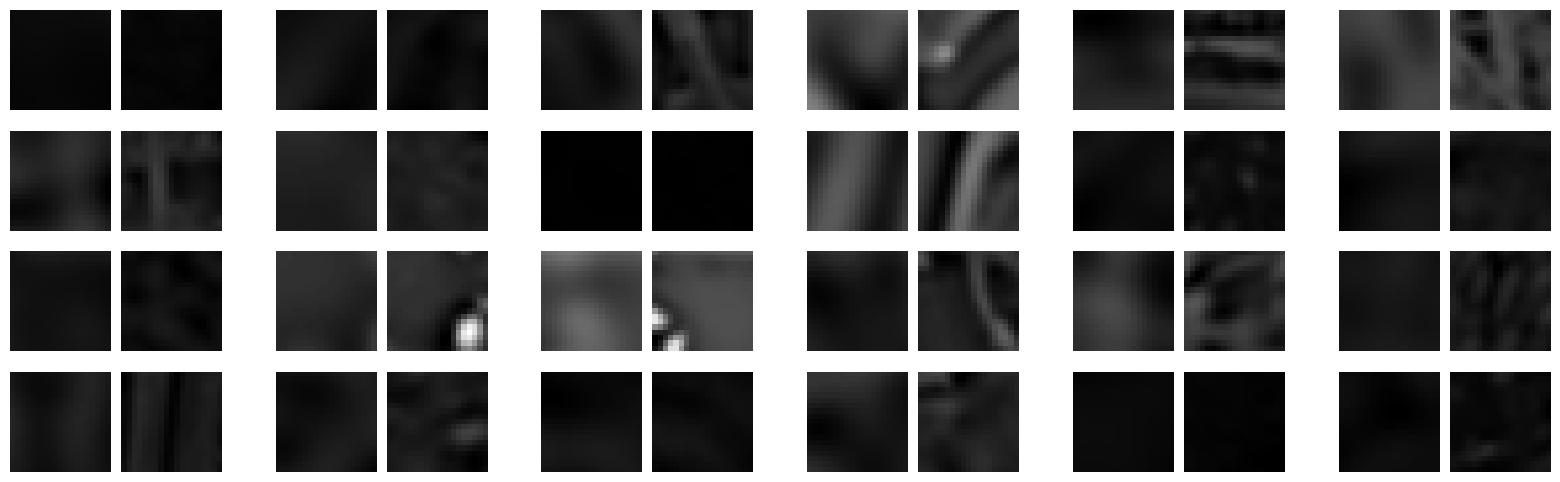

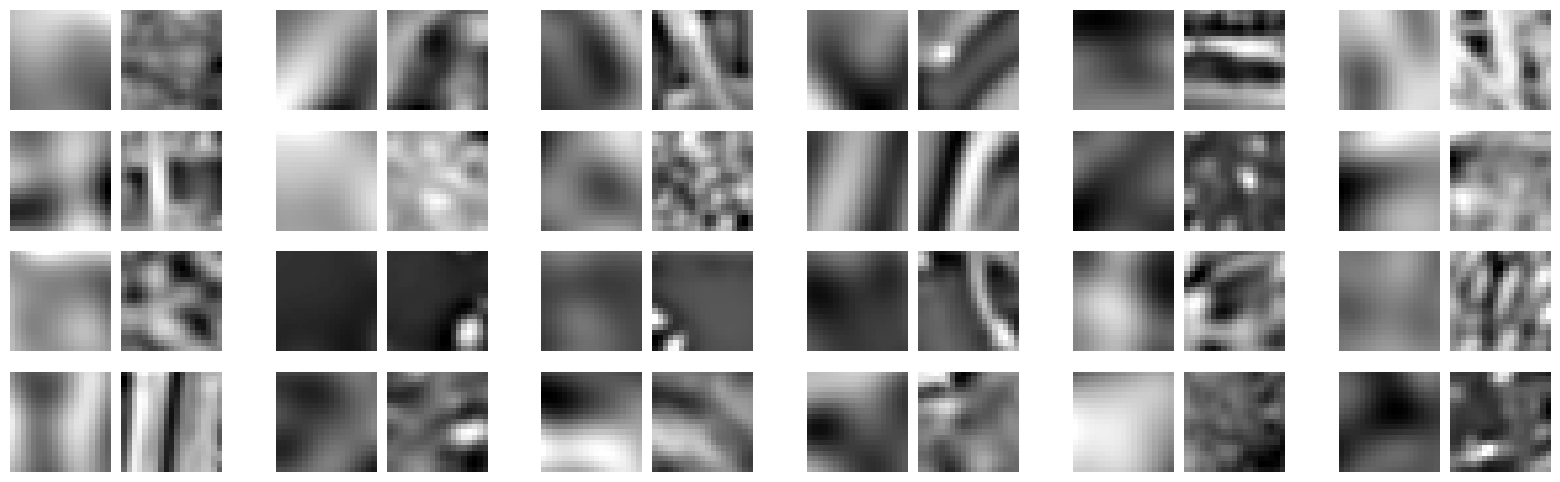

In [7]:
ims=inputs_to_images(X,buffer=2)

Nx=min(N_patches,24)
figure(figsize=(20,6))
for i in range(Nx):
    im=ims[i]
    subplot(4,6,i+1)
    imshow(im,cmap=plt.cm.gray)
    axis('off')
    
ims=inputs_to_images(X,buffer=2,scale_individually=True)
figure(figsize=(20,6))
for i in range(Nx):
    im=ims[i]
    subplot(4,6,i+1)
    imshow(im,cmap=plt.cm.gray)
    axis('off')
    


In [9]:
X[0,:]

array([ 2.67955467e-01,  2.93413076e-01,  3.14415604e-01,  3.32235931e-01,
        3.48465157e-01,  3.63103283e-01,  3.76468528e-01,  3.87606232e-01,
        3.95561735e-01,  3.99698596e-01,  4.00016816e-01,  3.98425716e-01,
        3.97471056e-01,  4.00335037e-01,  4.10199860e-01,  4.27383747e-01,
        4.51568476e-01,  4.79253626e-01,  5.05029456e-01,  2.75274529e-01,
        2.98822818e-01,  3.17597805e-01,  3.32872371e-01,  3.45282956e-01,
        3.55147780e-01,  3.62466842e-01,  3.66603704e-01,  3.66603704e-01,
        3.63103283e-01,  3.56102440e-01,  3.48465157e-01,  3.43055415e-01,
        3.42737195e-01,  3.50692698e-01,  3.66921924e-01,  3.90470213e-01,
        4.17518923e-01,  4.42976533e-01,  2.72728768e-01,  2.95004177e-01,
        3.12188063e-01,  3.25871528e-01,  3.35736352e-01,  3.42100755e-01,
        3.44328295e-01,  3.42100755e-01,  3.35418132e-01,  3.24280428e-01,
        3.10278743e-01,  2.96595277e-01,  2.86094013e-01,  2.81957152e-01,
        2.87048674e-01,  

- [ ] this